In [1]:
#https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

In [2]:
# Install Libraries
!pip install textblob
!pip install tweepy


In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Authentication
consumerKey = "qI4nOPZl0BBWdy7hiDMOCsTwF"
consumerSecret = "GJJZ1NNGJ3NrujukxNmjqsCRGQ5ANBUKf0RzwtCl8IUzc2SLbZ"
accessToken = "1277486040526315520-6Gw2AhYoM4HfcN7SZD2bpGQxKyPWRz"
accessTokenSecret = "NPSzAUasBO4Fs0vFjmDKvaDDR955zuaClaPiq80XdJ8Y9"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "bank of america"
noOfTweet = int('600')


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  600
positive number:  320
negative number:  63
neutral number:  217


In [7]:
tweet_list


,0
0,Bank of America on leisure spending #trading $...
1,kwon bo ah bank of america \n\n ...
2,RT @COSProject: Did we get off at the wrong st...
3,RT @moon45184976: Industry News: Bank of Am...
4,RT @imasuen_design: I have seen someone learn ...
...,...
595,RT @DocumentingBTC: #Bitcoin is now worth more...
596,Bank of America is setting the tone in hiring ...
597,Bank of America is setting the tone in hiring ...
598,RT @DocumentingBTC: #Bitcoin is now worth more...


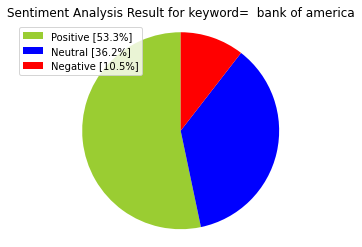

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)


In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Bank of America on leisure spending #trading $...,Bank of America on leisure spending #trading $...
1,kwon bo ah bank of america \n\n ...,kwon bo ah bank of america \n\n ...
2,RT @COSProject: Did we get off at the wrong st...,RT @COSProject: Did we get off at the wrong st...
3,RT @moon45184976: Industry News: Bank of Am...,RT @moon45184976: Industry News: Bank of Am...
4,RT @imasuen_design: I have seen someone learn ...,RT @imasuen_design: I have seen someone learn ...
...,...,...
593,RT @michelle_crypto: #Bitcoin is now worth mo...,RT @michelle_crypto: #Bitcoin is now worth mo...
594,"RT @wcnc: Legendary ""James Bond"" actor Daniel ...","RT @wcnc: Legendary ""James Bond"" actor Daniel ..."
596,Bank of America is setting the tone in hiring ...,Bank of America is setting the tone in hiring ...
597,Bank of America is setting the tone in hiring ...,Bank of America is setting the tone in hiring ...


In [11]:
tweet_list

,0,text
0,Bank of America on leisure spending #trading $...,Bank of America on leisure spending #trading $...
1,kwon bo ah bank of america \n\n ...,kwon bo ah bank of america \n\n ...
2,RT @COSProject: Did we get off at the wrong st...,RT @COSProject: Did we get off at the wrong st...
3,RT @moon45184976: Industry News: Bank of Am...,RT @moon45184976: Industry News: Bank of Am...
4,RT @imasuen_design: I have seen someone learn ...,RT @imasuen_design: I have seen someone learn ...
...,...,...
593,RT @michelle_crypto: #Bitcoin is now worth mo...,RT @michelle_crypto: #Bitcoin is now worth mo...
594,"RT @wcnc: Legendary ""James Bond"" actor Daniel ...","RT @wcnc: Legendary ""James Bond"" actor Daniel ..."
596,Bank of America is setting the tone in hiring ...,Bank of America is setting the tone in hiring ...
597,Bank of America is setting the tone in hiring ...,Bank of America is setting the tone in hiring ...


In [12]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Bank of America on leisure spending #trading $...,bank of america on leisure spending trading ...
1,kwon bo ah bank of america \n\n ...,kwon bo ah bank of america ...
2,RT @COSProject: Did we get off at the wrong st...,did we get off at the wrong stop we thought ...
3,RT @moon45184976: Industry News: Bank of Am...,industry news bank of america bitcoin is...
4,RT @imasuen_design: I have seen someone learn ...,i have seen someone learn frontend dev so he ...
5,RT @markbc2020: $AFRM HUGE UPGRADE BY BANK OF ...,afrm huge upgrade by bank of america from 1...
6,RT @TwoGoatsInc: #Immersive #training technolo...,immersive training technology helps bankof...
7,.@BofA_News continues to pave the way for wome...,news continues to pave the way for women w...
8,"Repost from @BankofAmerica—in 2020, when help ...",repost from in 2020 when help was needed mo...
9,RT @DocumentingBTC: #Bitcoin is now worth more...,bitcoin is now worth more than the three lar...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Bank of America on leisure spending #trading $...,bank of america on leisure spending trading ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,kwon bo ah bank of america \n\n ...,kwon bo ah bank of america ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @COSProject: Did we get off at the wrong st...,did we get off at the wrong stop we thought ...,-0.500000,0.900000,negative,0.306,0.694,0.000,-0.6486
3,RT @moon45184976: Industry News: Bank of Am...,industry news bank of america bitcoin is...,0.307143,0.714286,negative,0.137,0.765,0.098,-0.1779
4,RT @imasuen_design: I have seen someone learn ...,i have seen someone learn frontend dev so he ...,0.800000,0.700000,positive,0.000,0.872,0.128,0.4215
5,RT @markbc2020: $AFRM HUGE UPGRADE BY BANK OF ...,afrm huge upgrade by bank of america from 1...,0.400000,0.900000,positive,0.000,0.816,0.184,0.5423
6,RT @TwoGoatsInc: #Immersive #training technolo...,immersive training technology helps bankof...,0.000000,0.500000,positive,0.000,0.852,0.148,0.3818
7,.@BofA_News continues to pave the way for wome...,news continues to pave the way for women w...,0.000000,0.000000,positive,0.000,0.927,0.073,0.1280
8,"Repost from @BankofAmerica—in 2020, when help ...",repost from in 2020 when help was needed mo...,0.575000,0.725000,positive,0.000,0.732,0.268,0.6705
9,RT @DocumentingBTC: #Bitcoin is now worth more...,bitcoin is now worth more than the three lar...,0.400000,0.300000,positive,0.000,0.783,0.217,0.5719


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,163,45.53
positive,140,39.11
negative,55,15.36


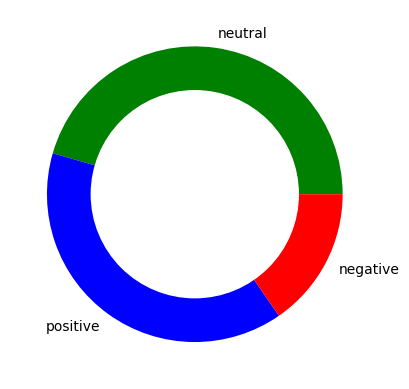

In [17]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [19]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [20]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)


,text_len
sentiment,
negative,101.58
neutral,88.79
positive,108.57


In [21]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)


,text_word_count
sentiment,
negative,18.15
neutral,14.65
positive,18.91


In [22]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [23]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [24]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [25]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [26]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [27]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Bank of America on leisure spending #trading $...,bank of america on leisure spending trading ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,52,8,bank of america on leisure spending trading ...,"[bank, of, america, on, leisure, spending, tra...","[bank, america, leisure, spending, trading, je...","[bank, america, leisur, spend, trade, jet, ]"
1,kwon bo ah bank of america \n\n ...,kwon bo ah bank of america ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,92,9,kwon bo ah bank of america ...,"[kwon, bo, ah, bank, of, america, both, being,...","[kwon, bo, ah, bank, america, boa]","[kwon, bo, ah, bank, america, boa]"
2,RT @COSProject: Did we get off at the wrong st...,did we get off at the wrong stop we thought ...,-0.500000,0.900000,negative,0.306,0.694,0.000,-0.6486,67,14,did we get off at the wrong stop we thought ...,"[, did, we, get, off, at, the, wrong, stop, we...","[, get, wrong, stop, thought, america, ]","[, get, wrong, stop, thought, america, ]"
3,RT @moon45184976: Industry News: Bank of Am...,industry news bank of america bitcoin is...,0.307143,0.714286,negative,0.137,0.765,0.098,-0.1779,104,16,industry news bank of america bitcoin is...,"[, industry, news, bank, of, america, bitcoin,...","[, industry, news, bank, america, bitcoin, imp...","[, industri, news, bank, america, bitcoin, imp..."
4,RT @imasuen_design: I have seen someone learn ...,i have seen someone learn frontend dev so he ...,0.800000,0.700000,positive,0.000,0.872,0.128,0.4215,121,23,i have seen someone learn frontend dev so he ...,"[, i, have, seen, someone, learn, frontend, de...","[, seen, someone, learn, frontend, dev, could,...","[, seen, someon, learn, frontend, dev, could, ..."


In [28]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

358 Number of reviews has 1390 words


In [29]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aaatrad,abl,access,accord,account,acquisit,across,activ,actor,...,year,yesterday,yet,yo,york,zar,zellikl,ziel,zinciri,zu
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
bank,279
america,228
stock,41
de,32
bitcoin,29
market,22
la,21
rais,18
news,17
expect,17


In [31]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('bank america', 215),
 ('big cap', 12),
 ('cap stocks', 12),
 ('beat street', 12),
 ('says bank', 12),
 ('according bank', 11),
 ('stocks likely', 11),
 ('likely beat', 11),
 ('street expectations', 11),
 ('expectations says', 11),
 ('rescue stock', 10),
 ('america stadium', 10),
 ('bitcoin worth', 9),
 ('largest banks', 9),
 ('altice usa', 9),
 ('afrm huge', 8),
 ('huge upgrade', 8),
 ('upgrade bank', 8),
 ('america 119', 8),
 ('119 160', 8)]

In [33]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('big cap stocks', 12),
 ('says bank america', 12),
 ('cap stocks likely', 11),
 ('stocks likely beat', 11),
 ('likely beat street', 11),
 ('beat street expectations', 11),
 ('street expectations says', 11),
 ('expectations says bank', 11),
 ('according bank america', 10),
 ('bank america stadium', 10),
 ('afrm huge upgrade', 8),
 ('huge upgrade bank', 8),
 ('upgrade bank america', 8),
 ('bank america 119', 8),
 ('america 119 160', 8),
 ('119 160 affirm', 8),
 ('160 affirm holdings', 8),
 ('affirm holdings afrm', 8),
 ('holdings afrm pt', 8),
 ('afrm pt raised', 8)]

In [34]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [42]:
BAC = yf.download("BAC", start="2021-10-11", end="2021-10-12", interval = "1h")
BAC.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-10-11 11:30:00-04:00,44.695000,44.805000,44.360001,44.375000,44.375000,3821358
2021-10-11 12:30:00-04:00,44.369999,44.400002,44.009998,44.029999,44.029999,4147808
2021-10-11 13:30:00-04:00,44.035000,44.169998,43.970001,43.994999,43.994999,3765296
2021-10-11 14:30:00-04:00,43.994999,44.115002,43.950001,43.950001,43.950001,4124917
2021-10-11 15:30:00-04:00,43.955002,44.008999,43.750000,43.775002,43.775002,6017494


<AxesSubplot:>

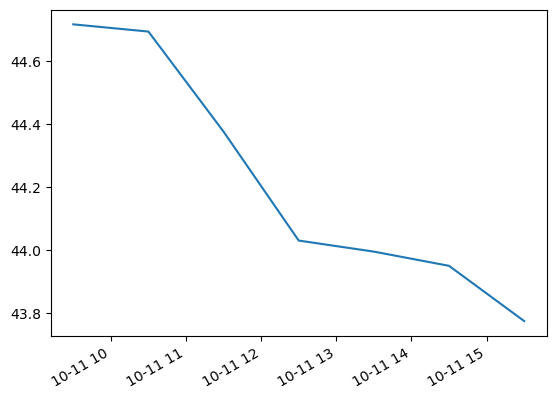

In [43]:
BAC['Adj Close'].plot()

In [40]:
tw_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                358 non-null    object 
 1   text             358 non-null    object 
 2   polarity         358 non-null    float64
 3   subjectivity     358 non-null    float64
 4   sentiment        358 non-null    object 
 5   neg              358 non-null    float64
 6   neu              358 non-null    float64
 7   pos              358 non-null    float64
 8   compound         358 non-null    float64
 9   text_len         358 non-null    int64  
 10  text_word_count  358 non-null    int64  
 11  punct            358 non-null    object 
 12  tokenized        358 non-null    object 
 13  nonstop          358 non-null    object 
 14  stemmed          358 non-null    object 
dtypes: float64(6), int64(2), object(7)
memory usage: 52.9+ KB
